# Activity Trends
<font size=4 color='blue'>Project: Congressional Activity</font>
***

**Project Summary:**  
Perform a trend analysis to see if the US Congress has become less productive over time

**Notebook Scope:**  
Exploratory Data Analysis of legislative activity, confirmations, and congressional demographics

**Output:**  
n/a

***
# Notebook Setup
***

In [1]:
# Import libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
# Set general options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Set defaults plotting defaults
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [11, 3]
plt.rcParams['legend.loc'] = (1.01, 0)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['grid.linestyle'] = ':'

***  
# Legislative Activity Data
***

In [4]:
# Read in legislative activity CSV
file_name = '../data/general_legislative_data.csv'
gen_activity_df = pd.read_csv(file_name)

In [5]:
# Preview the General Activity dataframe
gen_activity_df.head()

,Chamber,Congress,Session,Start Date,End Date,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
0,House,98,1,1983-01-03 00:00:00,1983-11-18 00:00:00,146.00,851:45,10665.00,NaN,114.00,...,440.00,237.00,385.00,35.00,297.00,201.00,4.00,1.00,29.00,NaN
1,Senate,98,1,1983-01-03 00:00:00,1983-11-18 00:00:00,150.00,1010:47,17224.00,NaN,101.00,...,209.00,86.00,302.00,18.00,381.00,NaN,3.00,NaN,4.00,NaN
2,Total,98,1,1983-01-03 00:00:00,1983-11-18 00:00:00,NaN,NaN,27889.00,5985.00,215.00,...,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,33.00,NaN
3,House,98,2,1984-01-23 00:00:00,1984-10-12 00:00:00,120.00,852:59,12293.00,NaN,242.00,...,223.00,142.00,235.00,55.00,227.00,181.00,9.00,1.00,30.00,NaN
4,Senate,98,2,1984-01-23 00:00:00,1984-10-12 00:00:00,131.00,940:28,14650.00,NaN,166.00,...,150.00,69.00,186.00,19.00,292.00,NaN,8.00,NaN,22.00,NaN


***
## View Columns
***

In [6]:
# View columns and datatypes
gen_activity_df.dtypes

Chamber                                              object
Congress                                              int64
Session                                               int64
Start Date                                           object
End Date                                             object
Days in session                                     float64
Time in session                                      object
Pages of proceedings                                float64
Extensions of remarks                               float64
Public bills enacted into law                       float64
Private bills enacted into law                      float64
Bills in conference                                 float64
Measures passed, total                              float64
Measures passed, Senate bills                       float64
Measures passed, House bills                        float64
Measures passed, Senate joint resolutions           float64
Measures passed, House joint resolutions

***
## Discard Unneeded Rows
***

In [7]:
# Delete rows where the Chamber is "Total". The original source data for totals is incomplete, and in some cases, inaccurate
rows_to_del = gen_activity_df[gen_activity_df['Chamber'] == 'Total'].index
gen_activity_df.drop(index=rows_to_del, inplace=True)
gen_activity_df.reset_index(drop=True, inplace=True)

In [8]:
# Preview dataset
gen_activity_df.head()

,Chamber,Congress,Session,Start Date,End Date,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
0,House,98,1,1983-01-03 00:00:00,1983-11-18 00:00:00,146.00,851:45,10665.00,NaN,114.00,...,440.00,237.00,385.00,35.00,297.00,201.00,4.00,1.00,29.00,NaN
1,Senate,98,1,1983-01-03 00:00:00,1983-11-18 00:00:00,150.00,1010:47,17224.00,NaN,101.00,...,209.00,86.00,302.00,18.00,381.00,NaN,3.00,NaN,4.00,NaN
2,House,98,2,1984-01-23 00:00:00,1984-10-12 00:00:00,120.00,852:59,12293.00,NaN,242.00,...,223.00,142.00,235.00,55.00,227.00,181.00,9.00,1.00,30.00,NaN
3,Senate,98,2,1984-01-23 00:00:00,1984-10-12 00:00:00,131.00,940:28,14650.00,NaN,166.00,...,150.00,69.00,186.00,19.00,292.00,NaN,8.00,NaN,22.00,NaN
4,House,99,1,1985-01-03 00:00:00,1985-12-20 00:00:00,152.00,965:16,13336.00,NaN,130.00,...,496.00,267.00,352.00,43.00,255.00,184.00,6.00,1.00,NaN,NaN


***
## Prep Data
***

In [9]:
# Drop Start and End Date columns
gen_activity_df.drop(columns=['Start Date', 'End Date'], inplace=True)

In [10]:
# Drop the minutes from Time in session to simplify analysis
gen_activity_df['Time in session'] = gen_activity_df['Time in session'].str.replace(':[0-9]+', ' ', regex=True).astype(int)

In [11]:
# Combine session data - our analysis is focused on statistics for the full congress
gen_activity_df = gen_activity_df.groupby('Congress').sum()
gen_activity_df.drop(columns=['Chamber', 'Session'], inplace=True)

In [12]:
# Preview data
gen_activity_df.head()

,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,Private bills enacted into law,Bills in conference,"Measures passed, total","Measures passed, Senate bills","Measures passed, House bills",...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
Congress,,,,,,,,,,,,,,,,,,,,,
98,547.00,3653,54832.00,0.00,623.00,52.00,16.00,2670.00,527.00,896.00,...,1022.00,534.00,1108.00,127.00,1197.00,382.00,24.00,2.00,85.00,0.00
99,594.00,4324,60836.00,0.00,664.00,24.00,29.00,2698.00,415.00,805.00,...,1188.00,594.00,1123.00,116.00,1219.00,411.00,20.00,3.00,0.00,0.00
100,605.00,3998,60425.00,0.00,713.00,48.00,28.00,2932.00,473.00,1010.00,...,1073.00,567.00,1127.00,99.00,1341.00,397.00,19.00,4.00,0.00,0.00
101,555.00,3940,58487.00,7870.00,650.00,16.00,97.00,2691.00,490.00,905.00,...,1075.00,560.00,902.00,51.00,1135.00,381.00,20.00,4.00,49.00,0.00
102,564.00,4085,61871.00,3332.00,590.00,20.00,23.00,2615.00,519.00,936.00,...,909.00,527.00,976.00,39.00,1059.00,392.00,24.00,2.00,0.00,11.00


***
## Statistical Analysis
***

In [13]:
gen_activity_df.describe()

,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,Private bills enacted into law,Bills in conference,"Measures passed, total","Measures passed, Senate bills","Measures passed, House bills",...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,609.10,4038.05,49030.30,3840.25,458.25,11.15,22.90,2437.35,399.10,935.30,...,421.90,436.05,1436.20,33.15,1312.95,540.25,8.75,1.40,6.70,0.55
std,63.77,511.29,9755.46,2003.48,137.36,15.51,25.72,435.84,102.82,156.16,...,392.68,183.82,540.55,37.19,238.87,220.32,8.96,1.60,21.43,2.46
min,538.00,3262.00,34455.00,0.00,283.00,0.00,1.00,1744.00,223.00,694.00,...,143.00,169.00,879.00,6.00,1007.00,16.00,0.00,0.00,0.00,0.00
25%,555.75,3685.25,37723.25,3217.50,332.75,1.00,5.50,2101.75,309.50,801.50,...,169.00,233.75,982.00,9.00,1184.75,395.75,0.00,0.00,0.00,0.00
50%,590.50,4041.50,51004.50,4398.00,444.50,4.50,14.00,2589.00,404.50,928.50,...,191.00,505.50,1244.50,18.50,1257.00,528.50,8.50,1.00,0.00,0.00
75%,639.00,4378.25,56087.00,4821.00,582.50,17.00,28.25,2692.75,478.00,996.50,...,723.00,573.75,1791.50,36.75,1364.50,657.50,16.00,2.00,0.00,0.00
max,752.00,5319.00,61871.00,7870.00,713.00,52.00,97.00,3336.00,561.00,1289.00,...,1188.00,684.00,2491.00,127.00,1929.00,1083.00,24.00,5.00,85.00,11.00


***
## Explore and Analyze
***

<font size=4>Bills Enacted
***

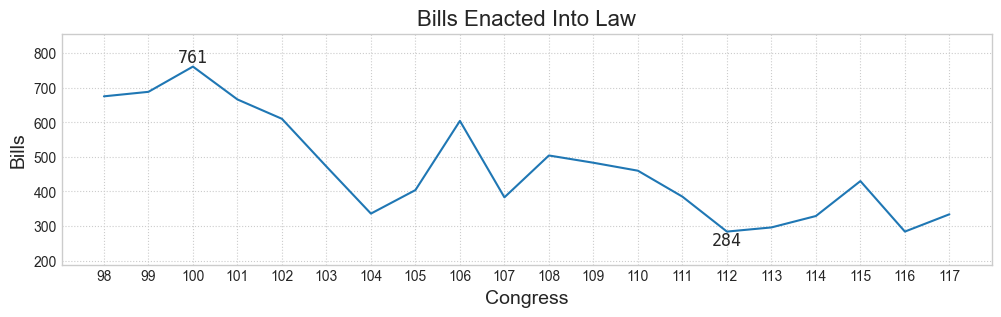

In [14]:
# Plot Public bills enacted into law
law_cols = ['Public bills enacted into law', 'Private bills enacted into law']
gen_activity_df['Total bills enacted'] = gen_activity_df[law_cols].sum(axis=1)
ax = gen_activity_df['Total bills enacted'].plot(kind='line', xticks=gen_activity_df.index, figsize=(12,3), legend=None)

# Mark min and max points
bills_max_x = gen_activity_df['Total bills enacted'].idxmax()
bills_max_y = gen_activity_df['Total bills enacted'].max()
bills_min_x = gen_activity_df['Total bills enacted'].idxmin()
bills_min_y = gen_activity_df['Total bills enacted'].min()
ax.text(bills_max_x, bills_max_y, int(bills_max_y), size=12, family='monospace', ha='center', va='bottom')
ax.text(bills_min_x, bills_min_y, int(bills_min_y), size=12, family='monospace', ha='center', va='top')

# Set labels and general formatting
plt.title('Bills Enacted Into Law')
plt.ylabel('Bills')
plt.margins(x=0.05, y=0.2)

# Draw plot
plt.show()

***
<font size=4>Days and Time in Session
***

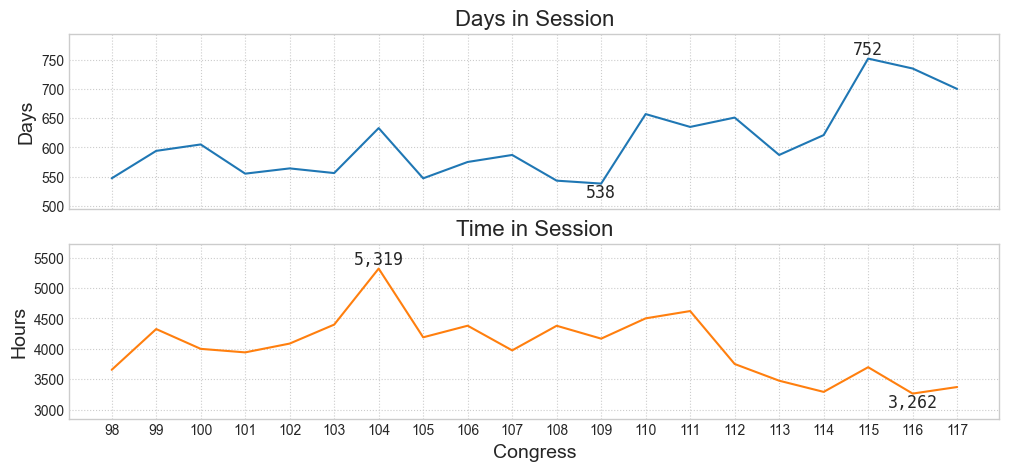

In [15]:
# Plot Days and Time in session
plot_df = gen_activity_df[['Days in session', 'Time in session']]
ax = plot_df.plot(kind='line', subplots=True, xticks=gen_activity_df.index, figsize=(12,5), legend=None)

# Plot 1 - Days in Session
plt.subplot(211)
# Mark min and max points
max_x = gen_activity_df['Days in session'].idxmax()
max_y = gen_activity_df['Days in session'].max()
min_x = gen_activity_df['Days in session'].idxmin()
min_y = gen_activity_df['Days in session'].min()
ax[0].text(max_x, max_y, int(max_y), size=12, family='monospace', ha='center', va='bottom')
ax[0].text(min_x, min_y, int(min_y), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Days in Session')
plt.ylabel('Days')
plt.margins(x=0.05, y=0.2)

# Plot 2 - Time in Session
plt.subplot(212)
# Mark min and max points
max_x = gen_activity_df['Time in session'].idxmax()
max_y = gen_activity_df['Time in session'].max()
min_x = gen_activity_df['Time in session'].idxmin()
min_y = gen_activity_df['Time in session'].min()
ax[1].text(max_x, max_y, format(max_y, ','), size=12, family='monospace', ha='center', va='bottom')
ax[1].text(min_x, min_y, format(min_y, ','), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Time in Session')
plt.ylabel('Hours')
plt.margins(x=0.05, y=0.2)

# Draw plots
plt.show()

***
<font color='blue'>**Observation:**</font>  
We would expect that Days in Session and Time in Session would follow the same trend line, but this is not the case. In terms
of analysis, we will use Time in session over Days in session, as a more accurate measure of activity.


***
<font size=4>Bills Enacted and Time in Session
***

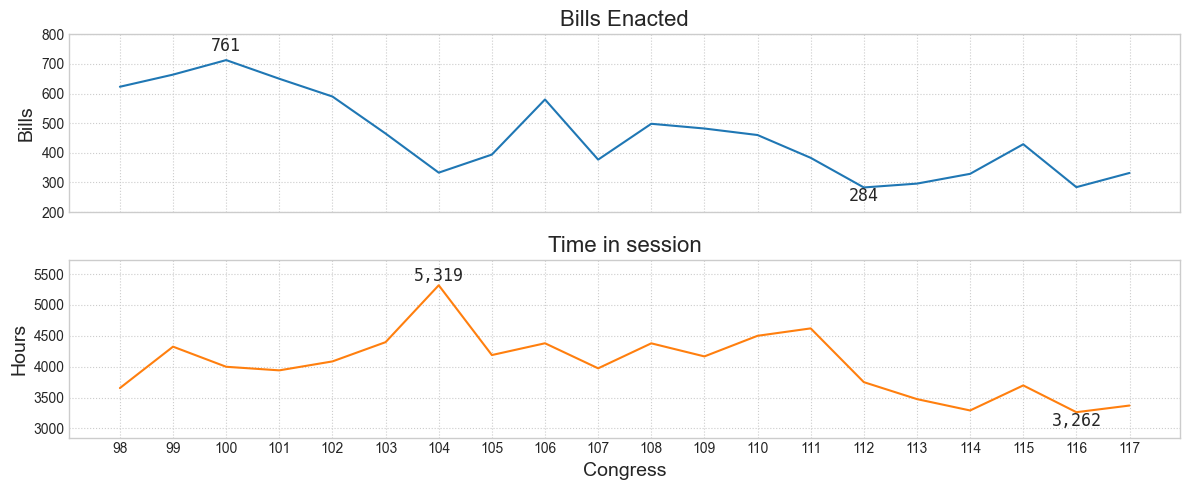

In [16]:
# Plot Public bills enacted into law and Time in session
plot_df = gen_activity_df[['Public bills enacted into law', 'Time in session']]
ax = plot_df.plot(kind='line', subplots=True, xticks=plot_df.index, figsize=(12,5), legend=None)

# Plot 1 - Bills Enacted
plt.subplot(211)
# Mark min and max points
ax[0].text(bills_max_x, bills_max_y, int(bills_max_y), size=12, family='monospace', ha='center', va='center')
ax[0].text(bills_min_x, bills_min_y, int(bills_min_y), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Bills Enacted')
plt.ylabel('Bills')
plt.ylim((200,800))
plt.margins(x=0.05, y=0.2)

# Plot 2 - Time in Session
plt.subplot(212)
# Mark min and max points
max_x = gen_activity_df['Time in session'].idxmax()
max_y = gen_activity_df['Time in session'].max()
min_x = gen_activity_df['Time in session'].idxmin()
min_y = gen_activity_df['Time in session'].min()
ax[1].text(max_x, max_y, format(max_y, ','), size=12, family='monospace', ha='center', va='bottom')
ax[1].text(min_x, min_y, format(min_y, ','), size=12, family='monospace', ha='center', va='top')
# Set lables and general formatting
plt.title('Time in session')
plt.ylabel('Hours')
plt.margins(x=0.05, y=0.2)

# Draw plots
plt.tight_layout()
plt.show()

In [17]:
# Measure the correlation between Time in session and Public bills enacted into law
print('Pearson correlation between Public bills enacted into law and Time in Session:')
corr_val = gen_activity_df[['Public bills enacted into law', 'Time in session']].corr().iloc[1,0]
print(f'{corr_val:.4f}')

Pearson correlation between Public bills enacted into law and Time in Session:
0.2201


***
<font color='blue'>**Observation:**</font>  
The 104th Congress had the max Time in Session, but one of the lowest number of Public Bills Enacted into Law. The trend lines for the 114th through 117th Congresses are the most similar. Will this trend continue in the future?

***
<font size=4>Bills Enacted and Measures Introduced</font>  
***

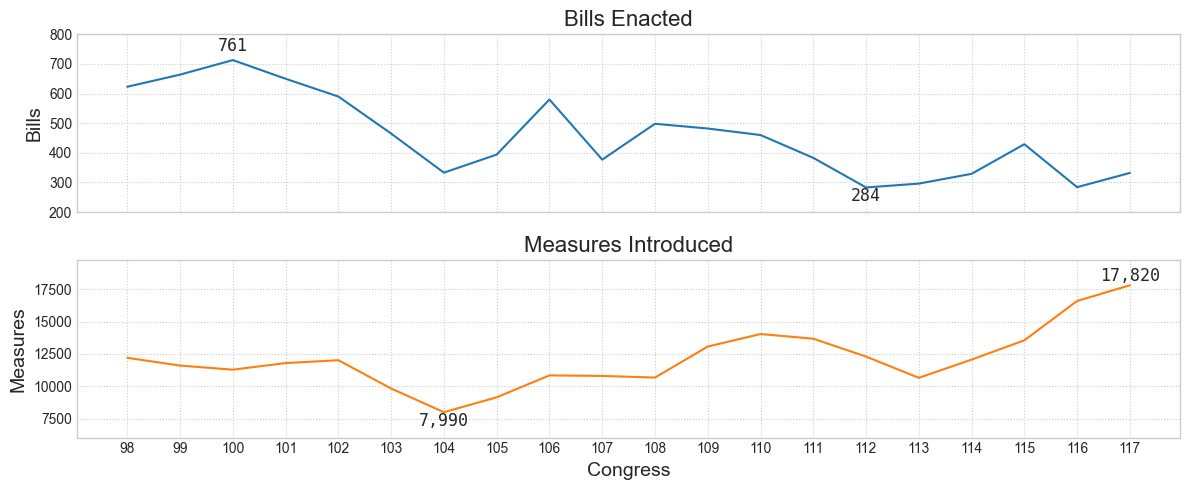

In [18]:
# Plot Public bills enacted into law and Measures introduced, total
plot_df = gen_activity_df[['Public bills enacted into law', 'Measures introduced, total']]
ax = plot_df.plot(kind='line', subplots=True, xticks=plot_df.index, figsize=(12,5), legend=None)

# Plot 1 - Bills Enacted
plt.subplot(211)
# Mark min and max points
ax[0].text(bills_max_x, bills_max_y, int(bills_max_y), size=12, family='monospace', ha='center', va='center')
ax[0].text(bills_min_x, bills_min_y, int(bills_min_y), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Bills Enacted')
plt.ylabel('Bills')
plt.ylim((200,800))
plt.margins(x=0.05, y=0.2)

# Plot 2 - Measures Introduced
plt.subplot(212)
# Mark min and max points
max_x = gen_activity_df['Measures introduced, total'].idxmax()
max_y = gen_activity_df['Measures introduced, total'].max()
min_x = gen_activity_df['Measures introduced, total'].idxmin()
min_y = gen_activity_df['Measures introduced, total'].min()
ax[1].text(max_x, max_y, format(max_y, ',.0f'), size=12, family='monospace', ha='center', va='bottom')
ax[1].text(min_x, min_y, format(min_y, ',.0f'), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Measures Introduced')
plt.ylabel('Measures')
plt.margins(x=0.05, y=0.2)

# Draw plots
plt.tight_layout()
plt.show()

In [19]:
# Measure the correlation between Time in session and Public bills enacted into law
print('Pearson correlation between Public bills enacted into law and Time in Session:')
corr_val = gen_activity_df[['Public bills enacted into law', 'Measures introduced, total']].corr().iloc[1,0]
print(f'{corr_val:.4f}')

Pearson correlation between Public bills enacted into law and Time in Session:
-0.2014


***
<font size=4>Bills Enacted and Votes Held</font>
***

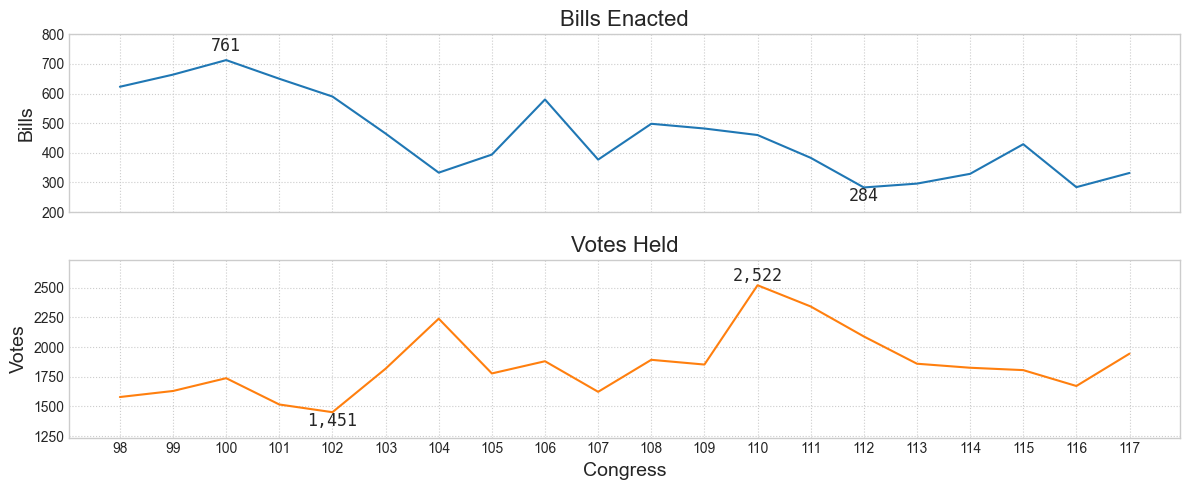

In [20]:
# Plot Public bills enacted into law and Votes taken
vote_cols = gen_activity_df.columns[gen_activity_df.columns.str.contains('votes')].to_list()
plot_df = pd.concat([gen_activity_df['Public bills enacted into law'], gen_activity_df[vote_cols].sum(axis=1)], axis=1)
plot_df.rename(columns={0: 'Votes held'}, inplace=True)
ax = plot_df.plot(kind='line', subplots=True, xticks=plot_df.index, figsize=(12,5), legend=None)

# Plot 1 - Bills Enacted
plt.subplot(211)
# Mark min and max points
ax[0].text(bills_max_x, bills_max_y, int(bills_max_y), size=12, family='monospace', ha='center', va='center')
ax[0].text(bills_min_x, bills_min_y, int(bills_min_y), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Bills Enacted')
plt.ylabel('Bills')
plt.ylim((200,800))
plt.margins(x=0.05, y=0.2)

# Plot 2 - Votes Held
plt.subplot(212)
# Mark min and max points
max_x = plot_df['Votes held'].idxmax()
max_y = plot_df['Votes held'].max()
min_x = plot_df['Votes held'].idxmin()
min_y = plot_df['Votes held'].min()
ax[1].text(max_x, max_y, format(max_y, ',.0f'), size=12, family='monospace', ha='center', va='bottom')
ax[1].text(min_x, min_y, format(min_y, ',.0f'), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Votes Held')
plt.ylabel('Votes')
plt.margins(x=0.05, y=0.2)

# Draw plots
plt.tight_layout()
plt.show()

In [21]:
# Measure the correlation between Public bills enacted into law and Votes held
print('Pearson correlation between Public bills enacted into law and Votes held:')
corr_val = plot_df[['Public bills enacted into law', 'Votes held']].corr().iloc[1,0]
print(f'{corr_val:.4f}')

Pearson correlation between Public bills enacted into law and Votes held:
-0.4379


***
# Appropriations Data
***

In [22]:
# Read in appropriations Excel
file_name = '../data/appropriations_data.xlsx'
approps_df = pd.read_excel(file_name)

In [23]:
# Preview the appropriations dataframe
approps_df.head()

,Congress,Session 1 FY,Session 1 Due Date,Session 1 Passed,Session 2 FY,Session 2 Due Date,Session 2 Passed,Continuing Resolutions
0,117,2022,2021-10-01,2022-03-15,2023,2022-10-01,2022-12-29,4
1,116,2020,2019-10-01,2019-12-20,2021,2020-10-01,2020-12-27,8
2,115,2018,2017-10-01,2018-03-23,2019,2018-10-01,2019-02-15,7
3,114,2016,2015-10-01,2015-12-18,2017,2016-10-01,2017-05-05,5
4,113,2014,2013-10-01,2014-01-17,2015,2014-10-01,2014-12-16,9


In [24]:
# View columns and datatypes
approps_df.dtypes

Congress                           int64
Session 1 FY                       int64
Session 1 Due Date        datetime64[ns]
Session 1 Passed          datetime64[ns]
Session 2 FY                       int64
Session 2 Due Date        datetime64[ns]
Session 2 Passed          datetime64[ns]
Continuing Resolutions             int64
dtype: object

In [25]:
# Set index
approps_df.set_index('Congress', drop=True, inplace=True)

***
## Prep Data
***

In [26]:
# Calculate how many dates past 10/1 appropriations were finalized
approps_df['Session 1 Late'] = approps_df['Session 1 Passed'] - approps_df['Session 1 Due Date']
approps_df['Session 2 Late'] = approps_df['Session 2 Passed'] - approps_df['Session 2 Due Date']
approps_df['Total Days Late'] = (approps_df['Session 1 Late'] + approps_df['Session 2 Late'])
approps_df['Total Days Late'] = approps_df['Total Days Late'].dt.days

***
## Statistical Analysis
***

In [27]:
approps_df[['Continuing Resolutions', 'Total Days Late']].describe()

,Continuing Resolutions,Total Days Late
count,20.00,20.00
mean,7.80,226.05
std,5.67,136.83
min,0.00,56.00
25%,5.00,131.50
50%,7.00,192.00
75%,10.00,277.50
max,28.00,590.00


***
## Explore and Analyze
***

***
<font size=4>Continuing Resolutions</font>
***

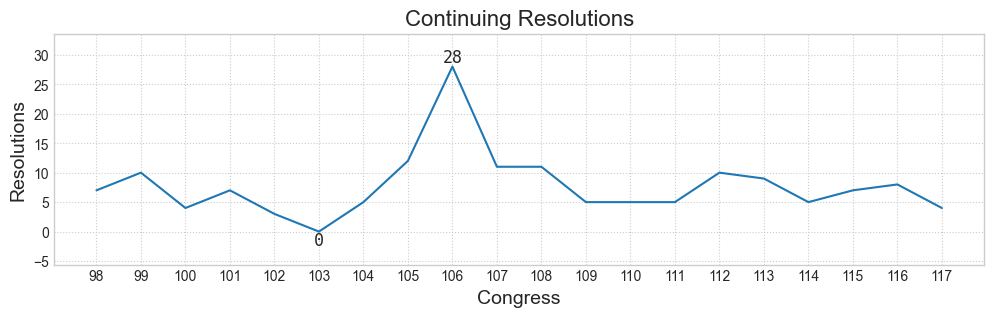

In [28]:
# Plot Public bills enacted into law
ax = approps_df['Continuing Resolutions'].plot(kind='line', xticks=approps_df.index, figsize=(12,3), legend=None)

# Mark min and max points
max_x = approps_df['Continuing Resolutions'].idxmax()
max_y = approps_df['Continuing Resolutions'].max()
min_x = approps_df['Continuing Resolutions'].idxmin()
min_y = approps_df['Continuing Resolutions'].min()
ax.text(max_x, max_y, int(max_y), size=12, family='monospace', ha='center', va='bottom')
ax.text(min_x, min_y, int(min_y), size=12, family='monospace', ha='center', va='top')

# Set labels and general formatting
plt.title('Continuing Resolutions')
plt.ylabel('Resolutions')
plt.margins(x=0.05, y=0.2)

# Draw plot
plt.show()

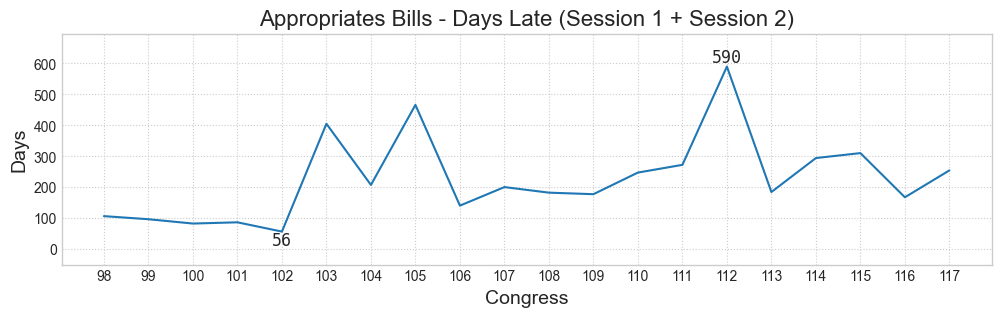

In [29]:
# Days Past Due by Session
ax = approps_df['Total Days Late'].plot(kind='line', xticks=approps_df.index, figsize=(12,3), legend=None)

# Mark min and max points
max_x = approps_df['Total Days Late'].idxmax()
max_y = approps_df['Total Days Late'].max()
min_x = approps_df['Total Days Late'].idxmin()
min_y = approps_df['Total Days Late'].min()
ax.text(max_x, max_y, int(max_y), size=12, family='monospace', ha='center', va='bottom')
ax.text(min_x, min_y, int(min_y), size=12, family='monospace', ha='center', va='top')

# Set labels and general formatting
plt.title('Appropriates Bills - Days Late (Session 1 + Session 2)')
plt.ylabel('Days')
plt.margins(x=0.05, y=0.2)

# Draw plot
plt.show()

***
# Confirmation Data
***

In [30]:
# Read in confirmation CSV
file_name = '../data/confirmation_data.csv'
confirm_df = pd.read_csv(file_name)

In [31]:
# Preview the confirmation dataframe
confirm_df.head()

,Congress,Session,Start Date,End Date,"Civilian, New nominations","Civilian, Confirmed","Civilian, Unconfirmed","Civilian, Withdrawn","Civilian, Rejected","Civilian, Returned",...,"Space Force, Unconfirmed","Space Force, Withdrawn","Space Force, Carryover nominations","Air Force, Failed","Civilian, Recess reappointments",Total recess reappointments,"Army, Failed","Civilian, Failed","Navy, Returned",Total failed
0,98,1,1983-01-03 00:00:00,1983-11-18 00:00:00,3454,2978,0,2,NaN,0,...,NaN,NaN,NaN,1.00,0,0,2,474,0,477
1,98,2,1984-01-23 00:00:00,1984-10-12 00:00:00,4127,4001,107,2,NaN,0,...,NaN,NaN,NaN,NaN,17,17,0,0,0,0
2,99,1,1985-01-03 00:00:00,1985-12-20 00:00:00,3719,3603,69,7,NaN,0,...,NaN,NaN,NaN,NaN,6,6,0,34,0,34
3,99,2,1986-01-21 00:00:00,1986-10-18 00:00:00,2046,2037,70,8,NaN,0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,100,1,1987-01-06 00:00:00,1987-12-22 00:00:00,4718,4569,122,10,1.00,16,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


***
## View Columns
***

In [32]:
# View columns and datatypes
confirm_df.dtypes

Congress                                 int64
Session                                  int64
Start Date                              object
End Date                                object
Civilian, New nominations                int64
Civilian, Confirmed                      int64
Civilian, Unconfirmed                    int64
Civilian, Withdrawn                      int64
Civilian, Rejected                     float64
Civilian, Returned                       int64
Air Force, New nominations               int64
Air Force, Confirmed                     int64
Air Force, Unconfirmed                 float64
Air Force, Returned                      int64
Army, New nominations                    int64
Army, Confirmed                          int64
Army, Unconfirmed                      float64
Army, Returned                           int64
Navy, New nominations                    int64
Navy, Confirmed                          int64
Navy, Unconfirmed                      float64
Marine Corps,

***
## Prep Data
***

In [33]:
# Combine session data - our analysis is focused on statistics for the full congress
confirm_df = confirm_df.groupby('Congress').sum()
confirm_df.drop(columns=['Session'], inplace=True)

In [34]:
# Drop the start date and end date columns as we have duration in both days and hours already in the dataset
confirm_df.drop(columns=['Start Date', 'End Date'], inplace=True)

In [35]:
# Preview data
confirm_df.head()

,"Civilian, New nominations","Civilian, Confirmed","Civilian, Unconfirmed","Civilian, Withdrawn","Civilian, Rejected","Civilian, Returned","Air Force, New nominations","Air Force, Confirmed","Air Force, Unconfirmed","Air Force, Returned",...,"Space Force, Unconfirmed","Space Force, Withdrawn","Space Force, Carryover nominations","Air Force, Failed","Civilian, Recess reappointments",Total recess reappointments,"Army, Failed","Civilian, Failed","Navy, Returned",Total failed
Congress,,,,,,,,,,,,,,,,,,,,,
98,7581,6979,107,4,0.00,0,24637,24636,26.00,0,...,0.00,0.00,0.00,1.00,17,17,2,474,0,477
99,5765,5640,139,15,0.00,0,33613,33613,2354.00,0,...,0.00,0.00,0.00,0.00,6,6,0,34,0,34
100,7388,6926,546,21,1.00,16,31016,31015,2955.00,1,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
101,5928,5544,366,45,1.00,0,24794,22816,2004.00,0,...,0.00,0.00,0.00,0.00,0,0,1,51,0,52
102,6037,5797,294,13,0.00,0,20485,20478,29.00,0,...,0.00,0.00,0.00,0.00,0,0,0,10,0,10


***
## Statistical Analysis
***

In [36]:
confirm_df.describe()

,"Civilian, New nominations","Civilian, Confirmed","Civilian, Unconfirmed","Civilian, Withdrawn","Civilian, Rejected","Civilian, Returned","Air Force, New nominations","Air Force, Confirmed","Air Force, Unconfirmed","Air Force, Returned",...,"Space Force, Unconfirmed","Space Force, Withdrawn","Space Force, Carryover nominations","Air Force, Failed","Civilian, Recess reappointments",Total recess reappointments,"Army, Failed","Civilian, Failed","Navy, Returned",Total failed
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,6086.85,5582.25,456.15,51.70,0.10,272.90,17599.75,17279.00,871.30,217.40,...,0.10,40.95,0.10,0.05,1.15,1.15,0.15,28.45,6.75,28.65
std,1282.06,1418.10,346.44,72.38,0.31,626.86,7018.78,7068.93,1471.94,861.81,...,0.45,183.13,0.45,0.22,3.96,3.96,0.49,105.72,11.92,106.39
min,4247.00,3501.00,2.00,4.00,0.00,0.00,9903.00,9671.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5233.25,4573.75,207.50,21.00,0.00,0.75,12254.75,12126.00,12.75,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5944.00,5659.50,359.50,37.00,0.00,131.00,14340.50,13626.00,70.00,3.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00
75%,6839.00,6242.00,584.75,48.50,0.00,205.00,23308.00,22827.50,1070.25,38.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.25,0.00
max,8991.00,8807.00,1179.00,345.00,1.00,2859.00,33613.00,33613.00,4958.00,3872.00,...,2.00,819.00,2.00,1.00,17.00,17.00,2.00,474.00,43.00,477.00


***
## Explore and Analyze
***


<font size=4>Total Confirmations</font>
***

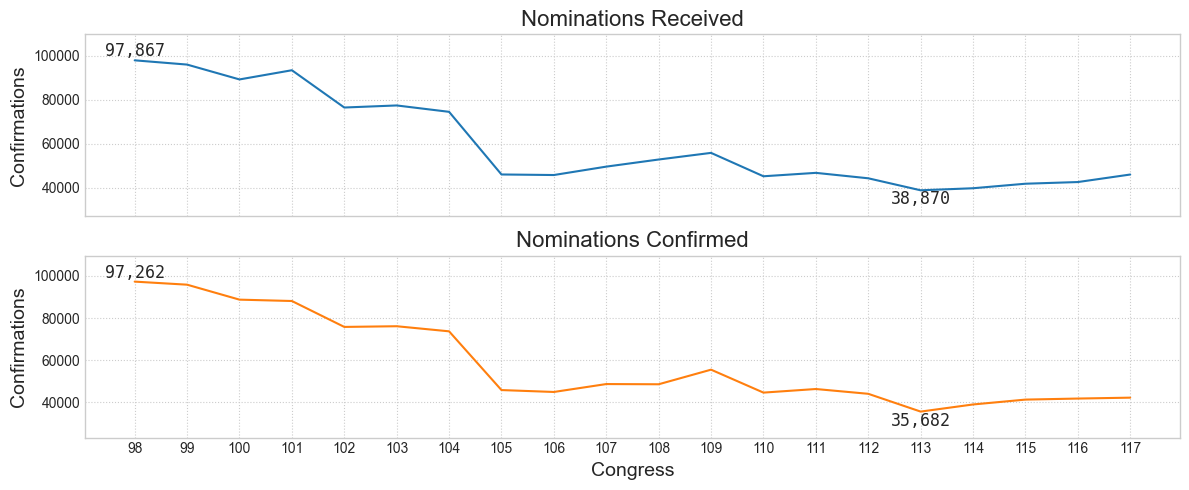

In [37]:
# Plot Total nominations and confirmations
ax = confirm_df[['Total new nominations', 'Total confirmed']].plot(kind='line', subplots=True, xticks=confirm_df.index, figsize=(12,5), legend=None)

# Plot 1 Total Nominations
plt.subplot(211)
# Mark min and max points
max_x = confirm_df['Total new nominations'].idxmax()
max_y = confirm_df['Total new nominations'].max()
min_x = confirm_df['Total new nominations'].idxmin()
min_y = confirm_df['Total new nominations'].min()
ax[0].text(max_x, max_y, format(max_y, ',.0f'), size=12, family='monospace', ha='center', va='bottom')
ax[0].text(min_x, min_y, format(min_y, ',.0f'), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Nominations Received')
plt.ylabel('Confirmations')
plt.margins(x=0.05, y=0.2)

# Plot 2 - Total Confirmations
plt.subplot(212)
# Mark min and max points
max_x = confirm_df['Total confirmed'].idxmax()
max_y = confirm_df['Total confirmed'].max()
min_x = confirm_df['Total confirmed'].idxmin()
min_y = confirm_df['Total confirmed'].min()
ax[1].text(max_x, max_y, format(max_y, ',.0f'), size=12, family='monospace', ha='center', va='bottom')
ax[1].text(min_x, min_y, format(min_y, ',.0f'), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Nominations Confirmed')
plt.ylabel('Confirmations')
plt.margins(x=0.05, y=0.2)

# Draw plots
plt.tight_layout()
plt.show()

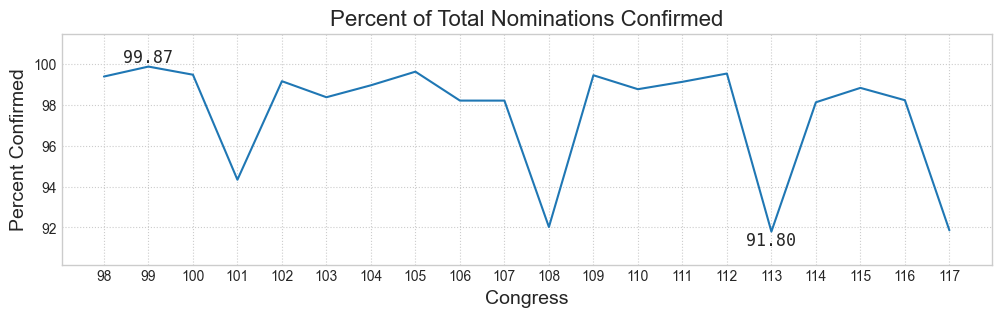

In [38]:
# Since the overall number of nominations has decreased significantly over the years, let's look at the percentage of nominations that
# are confirmed
confirm_df['Percent Confirmed'] = (confirm_df['Total confirmed'] / confirm_df['Total new nominations']) * 100
ax = confirm_df['Percent Confirmed'].plot(kind='line', xticks=confirm_df.index, figsize=(12,3), legend=None)

# Mark min and max points
max_x = confirm_df['Percent Confirmed'].idxmax()
max_y = confirm_df['Percent Confirmed'].max()
min_x = confirm_df['Percent Confirmed'].idxmin()
min_y = confirm_df['Percent Confirmed'].min()
ax.text(max_x, max_y, format(max_y, '.2f'), size=12, family='monospace', ha='center', va='bottom')
ax.text(min_x, min_y, format(min_y, '.2f'), size=12, family='monospace', ha='center', va='top')

# Set labels and general formatting
plt.title('Percent of Total Nominations Confirmed')
plt.ylabel('Percent Confirmed')
plt.margins(x=0.05, y=0.2)

# Draw plot
plt.show()

***
# Demographics Data
***

In [39]:
# Read in demographics Excel file
file_name = '../data/demographics_data.xlsx'
demog_df = pd.read_excel(file_name)

In [40]:
# Preview the confirmation dataframe
demog_df.head()

,Congress,Chamber,Members,Vacant,Democrats,Republicans,Other Parties,6 years or less,7 - 12 years,13 - 18 years,19 years or more
0,34,House,234,0,83,108,43,0,0,0,0
1,34,Senate,62,0,42,15,5,0,0,0,0
2,35,House,237,0,131,92,14,0,0,0,0
3,35,Senate,64,0,39,20,5,0,0,0,0
4,36,House,237,0,101,113,23,0,0,0,0


In [41]:
# Load Presidential Party data
file_name = '../data/presidential_party_data.xlsx'
pres_party_df = pd.read_excel(file_name)
pres_party_df.set_index('Congress', inplace=True)

In [42]:
# Preview data
pres_party_df.head()

,Presidential Party
Congress,
117,Republican
116,Republican
115,Republican
114,Democrat
113,Democrat


***
## View Columns
***

In [43]:
# View columns and datatypes
demog_df.dtypes

Congress             int64
Chamber             object
Members              int64
Vacant               int64
Democrats            int64
Republicans          int64
Other Parties        int64
6 years or less      int64
7 - 12 years         int64
13 - 18 years        int64
19 years or more     int64
dtype: object

In [44]:
# View columns and datatypes
pres_party_df.dtypes

Presidential Party    object
dtype: object

***
## Discard Unneeded Rows
***

In [45]:
# Discard rows prior to the 98th Congress
rows_to_del = demog_df[demog_df['Congress'].astype(int) < 98].index
demog_df.drop(index=rows_to_del, inplace=True)
demog_df.reset_index(drop=True, inplace=True)

In [46]:
# Preview dataset
demog_df.head()

,Congress,Chamber,Members,Vacant,Democrats,Republicans,Other Parties,6 years or less,7 - 12 years,13 - 18 years,19 years or more
0,98,House,435,1,268,166,0,210,125,45,54
1,98,Senate,100,0,46,54,0,43,28,16,13
2,99,House,435,1,252,182,0,184,138,58,54
3,99,Senate,100,0,47,53,0,32,38,18,12
4,100,House,435,0,258,177,0,163,143,64,65


***
## Prep Data
***

In [47]:
# Since the division of party membership needs to be retained by Chamber, let's separate out that data
house_df = demog_df[demog_df['Chamber'] == 'House'].copy().set_index('Congress', drop=True)
house_df.rename(columns={'Members': 'House Members', 'Vacant': 'House Vacant', 'Democrats': 'House Dems', 'Republicans': 'House Repubs', 
                         'Other Parties': 'House Other'}, inplace=True)
senate_df = demog_df[demog_df['Chamber'] == 'Senate'].copy().set_index('Congress', drop=True)
senate_df.rename(columns={'Members': 'Senate Members', 'Vacant': 'Senate Vacant', 'Democrats': 'Senate Dems', 'Republicans': 'Senate Repubs', 
                          'Other Parties': 'Senate Other'}, inplace=True)
house_cols = ['House Members', 'House Vacant', 'House Dems', 'House Repubs', 'House Other']
senate_cols = ['Senate Members', 'Senate Vacant', 'Senate Dems', 'Senate Repubs', 'Senate Other']
party_df = pd.concat([house_df[house_cols], senate_df[senate_cols]], axis=1)

In [48]:
# Add majority party and margin of majority for each house of majority party
party_df['House Margin'] = party_df['House Dems'] + party_df['House Other'] - party_df['House Repubs']
party_df['House Majority'] = ['Democrat' if x > 0 else ('Republican' if x < 0 else 'Split') for x in party_df['House Margin']]
party_df['House Margin'] = abs(party_df['House Margin'])
party_df['Senate Margin'] = party_df['Senate Dems'] + party_df['Senate Other'] - party_df['Senate Repubs']
party_df['Senate Majority'] = ['Democrat' if x > 0 else ('Republican' if x < 0 else 'Split') for x in party_df['Senate Margin']]
party_df['Senate Margin'] = abs(party_df['Senate Margin'])

In [49]:
# Add presidential party data
party_df = pd.concat([party_df, pres_party_df], axis=1)

In [50]:
# Preview party data
party_df.head()

,House Members,House Vacant,House Dems,House Repubs,House Other,Senate Members,Senate Vacant,Senate Dems,Senate Repubs,Senate Other,House Margin,House Majority,Senate Margin,Senate Majority,Presidential Party
Congress,,,,,,,,,,,,,,,
98,435,1,268,166,0,100,0,46,54,0,102,Democrat,8,Republican,Republican
99,435,1,252,182,0,100,0,47,53,0,70,Democrat,6,Republican,Republican
100,435,0,258,177,0,100,0,55,45,0,81,Democrat,10,Democrat,Republican
101,435,2,259,174,0,100,0,55,45,0,85,Democrat,10,Democrat,Republican
102,435,0,267,167,1,100,0,56,44,0,101,Democrat,12,Democrat,Republican


In [51]:
# Group seniority data
seniority_df = demog_df[['Congress', 'Members', 'Vacant', '6 years or less', '7 - 12 years', '13 - 18 years', 
                         '19 years or more']].groupby(by='Congress').sum()
seniority_df.head()

,Members,Vacant,6 years or less,7 - 12 years,13 - 18 years,19 years or more
Congress,,,,,,
98,535,1,253,153,61,67
99,535,1,216,176,76,66
100,535,0,189,187,80,79
101,535,2,151,193,115,74
102,535,0,163,160,119,93


***
## Statistical Analysis
***

In [52]:
party_df.describe()

,House Members,House Vacant,House Dems,House Repubs,House Other,Senate Members,Senate Vacant,Senate Dems,Senate Repubs,Senate Other,House Margin,Senate Margin
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,434.85,0.60,226.10,207.85,0.45,100.00,0.05,49.30,49.70,0.90,49.10,7.50
std,0.49,0.75,28.00,28.04,0.60,0.00,0.22,4.39,4.52,0.97,30.95,4.39
min,433.00,0.00,188.00,166.00,0.00,100.00,0.00,44.00,41.00,0.00,8.00,0.00
25%,435.00,0.00,203.25,177.75,0.00,100.00,0.00,45.75,45.00,0.00,24.50,5.50
50%,435.00,0.00,216.50,216.00,0.00,100.00,0.00,48.00,50.50,0.50,41.50,8.00
75%,435.00,1.00,256.50,230.50,1.00,100.00,0.00,53.50,53.25,2.00,78.75,10.00
max,435.00,2.00,268.00,247.00,2.00,100.00,1.00,57.00,55.00,2.00,102.00,16.00


In [53]:
seniority_df.describe()

,Members,Vacant,6 years or less,7 - 12 years,13 - 18 years,19 years or more
count,20.00,20.00,20.00,20.00,20.00,20.00
mean,534.85,0.65,208.75,146.65,87.25,91.65
std,0.49,0.81,34.81,29.35,20.34,14.47
min,533.00,0.00,151.00,95.00,61.00,66.00
25%,535.00,0.00,179.00,119.50,73.00,82.75
50%,535.00,0.00,212.50,152.50,79.00,92.50
75%,535.00,1.00,226.25,164.00,103.75,101.25
max,535.00,2.00,283.00,193.00,126.00,124.00


***
## Explore and Analyze
***


<font size=4>Party Trends</font>
***

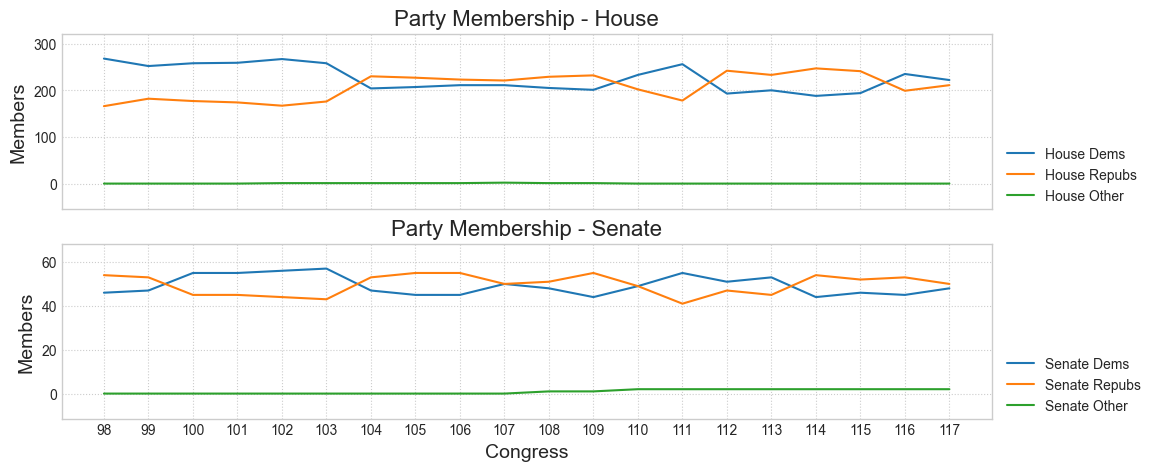

In [54]:
# Party trends by House
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,5))

# Plot 1 - House membership
plt.subplot(211)
party_df[['House Dems', 'House Repubs', 'House Other']].plot(ax=ax[0], legend='outside')
plt.title('Party Membership - House')
plt.ylabel('Members')
plt.margins(x=0.05, y=0.2)
plt.legend()

# Plot 2 - Senate membership
plt.subplot(212)
party_df[['Senate Dems', 'Senate Repubs', 'Senate Other']].plot(ax=ax[1], xticks=party_df.index, legend='outside')
plt.title('Party Membership - Senate')
plt.ylabel('Members')
plt.margins(x=0.05, y=0.2)
plt.legend()
plt.show()

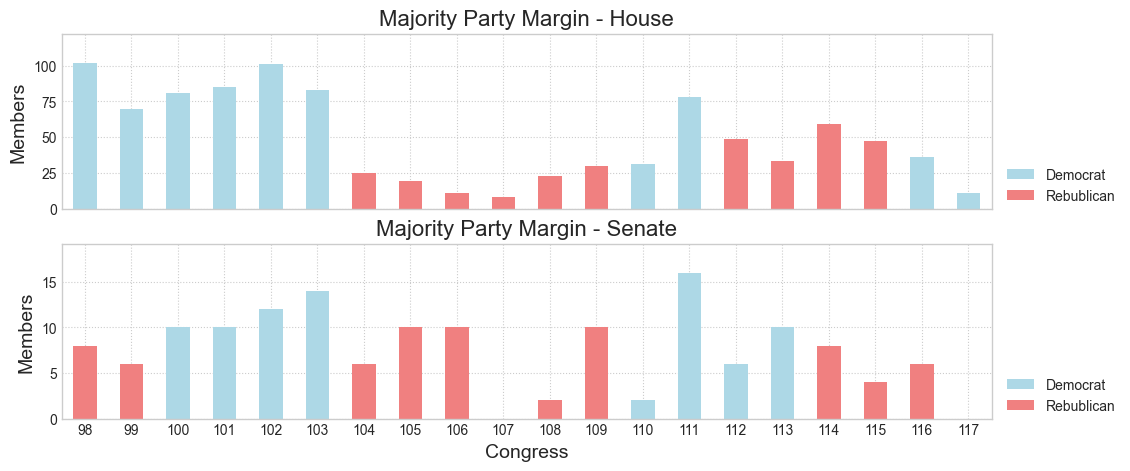

In [55]:
# Margin of majority party
house_colors = ['lightblue' if x == 'Democrat' else ('lightcoral' if x == 'Republican' else 'gray') for x in party_df['House Majority']]
senate_colors = ['lightblue' if x == 'Democrat' else ('lightcoral' if x == 'Republican' else 'gray') for x in party_df['Senate Majority']]
handles = [Patch(facecolor='lightblue', label='Democrat'), Patch(facecolor='lightcoral', label='Rebublican')]
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,5))

# Plot 1 - House margin and party
plt.subplot(211)
party_df['House Margin'].plot(kind='bar', color=house_colors, ax=ax[0], legend='outside')
plt.title('Majority Party Margin - House')
plt.ylabel('Members')
plt.margins(x=0.05, y=0.2)
plt.legend(handles=handles)

# Plot 2 - Senate margin and party
plt.subplot(212)
party_df['Senate Margin'].plot(kind='bar', color=senate_colors, ax=ax[1], legend='outside')
plt.title('Majority Party Margin - Senate')
plt.ylabel('Members')
plt.xticks(rotation=0)
plt.margins(x=0.05, y=0.2)
plt.legend(handles=handles)
plt.show()

***
<font size=4>Seniority Trends</font>
***

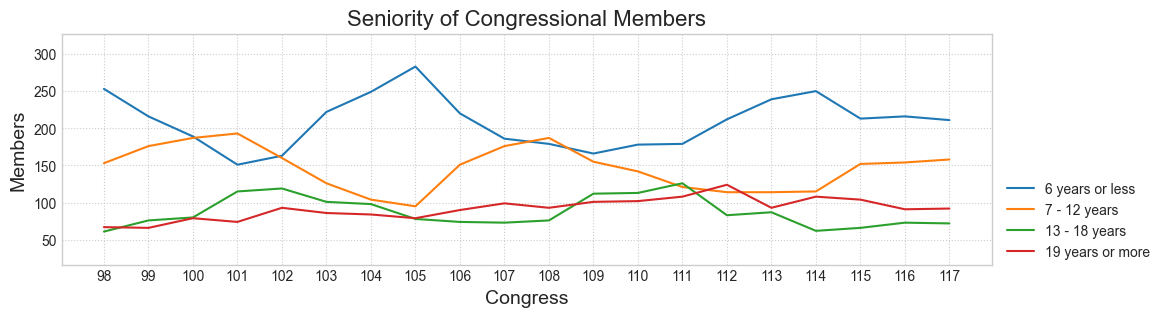

In [56]:
# Plot average seniority of congressional members
ax = seniority_df.drop(columns=['Members', 'Vacant']).plot(kind='line', xticks=seniority_df.index, figsize=(12,3), legend='outside')

# Set labels and general formatting
plt.title('Seniority of Congressional Members')
plt.ylabel('Members')
plt.margins(x=0.05, y=0.2)
plt.legend()

# Draw plot
plt.show()

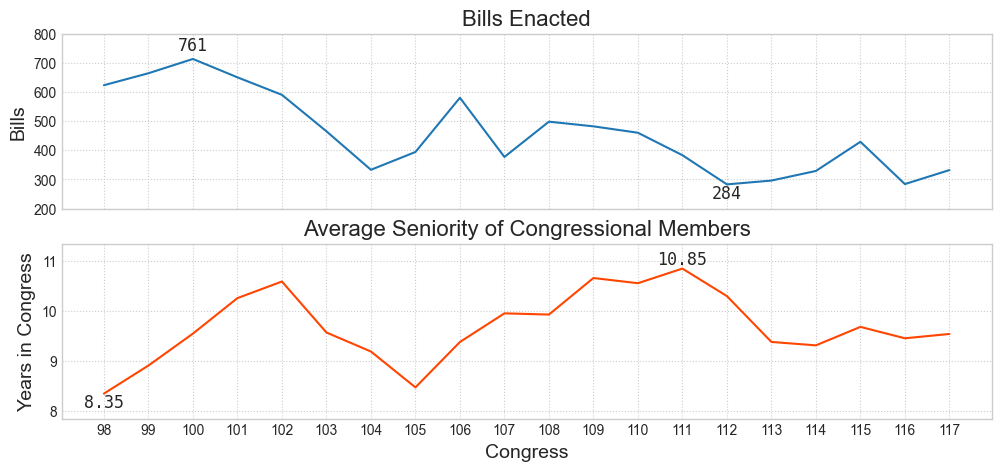

In [57]:
# Plot average seniority of congressional members versus bills enacted
seniority_df['Seated Members'] = seniority_df['Members'] - seniority_df['Vacant']
sen_calc_df = seniority_df[['6 years or less', '7 - 12 years', '13 - 18 years', '19 years or more', 'Seated Members']].copy()
cols = sen_calc_df.columns.to_list()
for x in range(0, 4):
    sen_calc_df[x] = sen_calc_df[cols[x]] * ((x * 6) + 3)
seniority_df['Average Seniority'] = sen_calc_df[[0, 1, 2, 3]].sum(axis=1) /  sen_calc_df['Seated Members']
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,5))

# Plot 1 - Bills Enacted
plt.subplot(211)
plot_df['Public bills enacted into law'].plot(kind='line', ax=ax[0], legend=None)
# Mark min and max points
ax[0].text(bills_max_x, bills_max_y, int(bills_max_y), size=12, family='monospace', ha='center', va='center')
ax[0].text(bills_min_x, bills_min_y, int(bills_min_y), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Bills Enacted')
plt.ylabel('Bills')
plt.ylim((200, 800))
plt.margins(x=0.05, y=0.2)

# Plot 2 - Average Seniority
plt.subplot(212)
seniority_df['Average Seniority'].plot(kind='line', ax=ax[1], color='orangered', xticks=seniority_df.index, legend=None)
# Mark min and max points
max_x = seniority_df['Average Seniority'].idxmax()
max_y = seniority_df['Average Seniority'].max()
min_x = seniority_df['Average Seniority'].idxmin()
min_y = seniority_df['Average Seniority'].min()
ax[1].text(max_x, max_y, format(max_y, '.2f'), size=12, family='monospace', ha='center', va='bottom')
ax[1].text(min_x, min_y, format(min_y, '.2f'), size=12, family='monospace', ha='center', va='top')
# Set labels and general formatting
plt.title('Average Seniority of Congressional Members')
plt.ylabel('Years in Congress')
plt.margins(x=0.05, y=0.2)

# Draw plot
plt.show()

***
<font color='blue'>**Note:**</font>  
Average seniority is a generalization that shows relative trends, not a mathematically correct calculation.

***
# Correlation of Productivity Measures
***

In [58]:
# View consolidated trends for Bills Enacted, Confirmations, and Lateness of Appropriations
prod_meas_df = pd.concat([gen_activity_df['Total bills enacted'], confirm_df['Percent Confirmed'], approps_df['Total Days Late']], axis=1)

In [59]:
# Calculate the correlation between Bills Enacted, Confirmations, and Lateness of Appropriations
prod_meas_df = pd.concat([gen_activity_df['Total bills enacted'], confirm_df['Percent Confirmed'], approps_df['Total Days Late']], axis=1)
prod_meas_df.corr()

,Total bills enacted,Percent Confirmed,Total Days Late
Total bills enacted,1.00,0.20,-0.62
Percent Confirmed,0.20,1.00,0.15
Total Days Late,-0.62,0.15,1.00


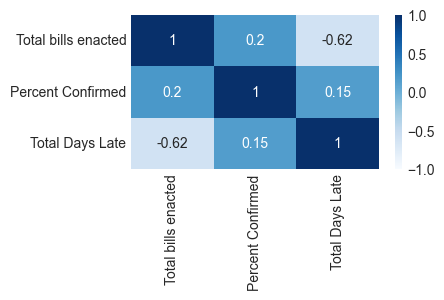

In [60]:
plt.figure(figsize=(4,2))
sns.heatmap(prod_meas_df.corr(), vmin=-1, cmap='Blues', annot=True)
plt.show()

***
# Correlation of Demographics
***

In [62]:
# Merge all dataframes of interest
factors_df = pd.concat([prod_meas_df, party_df, seniority_df], axis=1)
factors_df.head()

,Total bills enacted,Percent Confirmed,Total Days Late,House Members,House Vacant,House Dems,House Repubs,House Other,Senate Members,Senate Vacant,...,Senate Majority,Presidential Party,Members,Vacant,6 years or less,7 - 12 years,13 - 18 years,19 years or more,Seated Members,Average Seniority
Congress,,,,,,,,,,,,,,,,,,,,,
98,675.00,99.38,106,435,1,268,166,0,100,0,...,Republican,Republican,535,1,253,153,61,67,534,8.35
99,688.00,99.87,96,435,1,252,182,0,100,0,...,Republican,Republican,535,1,216,176,76,66,534,8.91
100,761.00,99.47,82,435,0,258,177,0,100,0,...,Democrat,Republican,535,0,189,187,80,79,535,9.55
101,666.00,94.33,86,435,2,259,174,0,100,0,...,Democrat,Republican,535,2,151,193,115,74,533,10.26
102,610.00,99.15,56,435,0,267,167,1,100,0,...,Democrat,Republican,535,0,163,160,119,93,535,10.59


In [63]:
# Convert all categorical fields
factors_df.replace('Democrat', '1', regex=True, inplace=True)
factors_df.replace('Republican', '2', regex=True, inplace=True)
factors_df = factors_df.replace('Split', '3', regex=True).astype(int)

In [65]:
# Remove columns that are duplicates or relatively static
factors_df.drop(columns=['House Members', 'Vacant', 'Senate Members', 'Senate Vacant', 'Members', 'Vacant', 'Seated Members'], inplace=True)

In [66]:
# Calculate the correlation between Bills Enacted, Confirmations, and Lateness of Appropriations
corr_df = factors_df.corr()
corr_df.head()

,Total bills enacted,Percent Confirmed,Total Days Late,House Vacant,House Dems,House Repubs,House Other,Senate Dems,Senate Repubs,Senate Other,House Margin,House Majority,Senate Margin,Senate Majority,Presidential Party,6 years or less,7 - 12 years,13 - 18 years,19 years or more,Average Seniority
Total bills enacted,1.00,0.22,-0.62,-0.07,0.65,-0.65,-0.03,0.22,-0.06,-0.67,0.55,-0.44,0.24,-0.21,0.45,-0.32,0.65,0.09,-0.65,-0.15
Percent Confirmed,0.22,1.00,0.13,-0.57,0.20,-0.19,0.13,-0.12,0.16,-0.29,0.33,-0.07,0.33,-0.14,-0.09,0.09,-0.19,0.10,0.05,-0.02
Total Days Late,-0.62,0.13,1.00,-0.33,-0.47,0.48,-0.00,-0.06,-0.03,0.37,-0.25,0.37,-0.02,-0.07,-0.57,0.39,-0.67,-0.10,0.55,0.05
House Vacant,-0.07,-0.57,-0.33,1.00,0.18,-0.20,-0.28,0.12,-0.16,0.16,-0.02,-0.27,-0.06,0.17,0.25,-0.17,0.25,0.08,-0.24,0.02
House Dems,0.65,0.20,-0.47,0.18,1.00,-1.00,-0.19,0.57,-0.49,-0.43,0.75,-0.91,0.41,-0.38,0.34,-0.33,0.40,0.38,-0.56,0.01


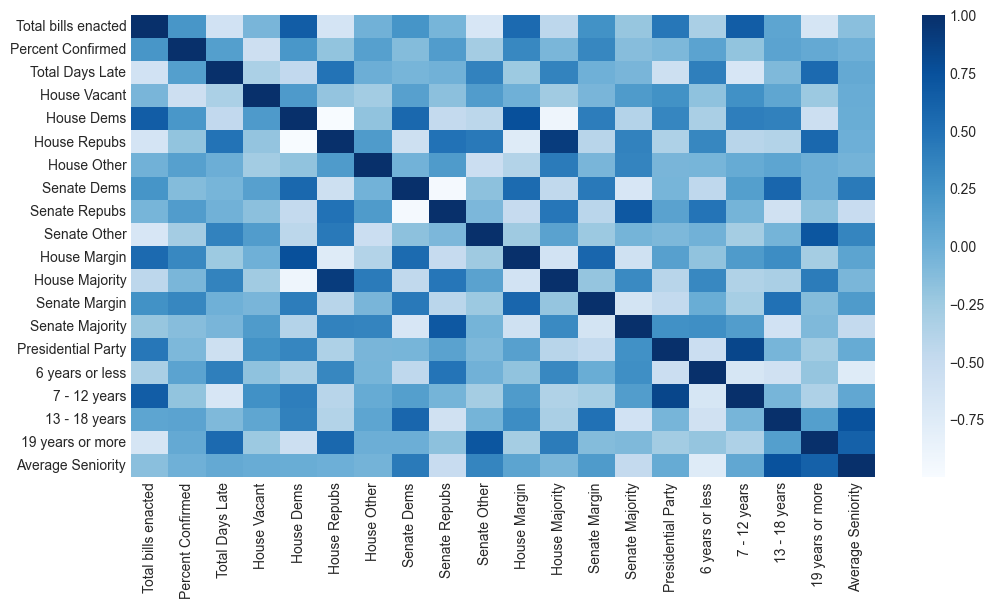

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_df, cmap='Blues')
plt.show()

In [83]:
# Eliminate duplication between rows and columns
prod_meas_cols = ['Total bills enacted', 'Percent Confirmed', 'Total Days Late']
filtered_corr_df = corr_df.filter(prod_meas_cols)
filtered_corr_df.head()
filtered_corr_df.drop(index=prod_meas_cols, inplace=True)
filtered_corr_df = filtered_corr_df.transpose()

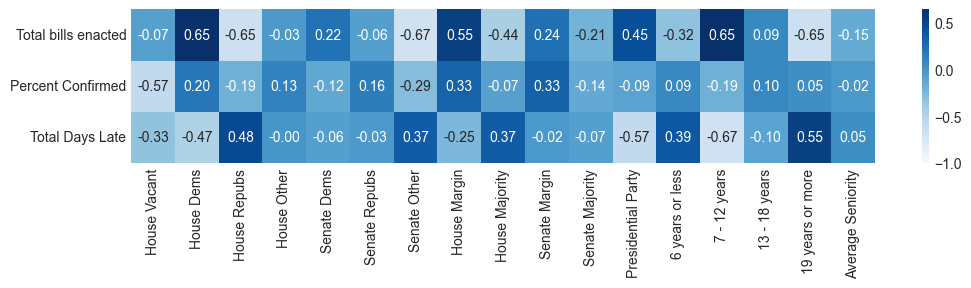

In [96]:
# Plot heatmap
plt.figure(figsize=(12,2))
sns.heatmap(filtered_corr_df, vmin=-1, cmap='Blues', annot=True, fmt='.2f')
plt.show()

***
<font color='blue'>**Observation:**</font>
None of the factors measured show a significant correlation.


***
**End**
***